<a href="https://colab.research.google.com/github/jaramillooo/etica_datos/blob/main/DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
#!unzip :n "/Users/axeljaramillo/Documents/etica_ds/archive (2).zip"

In [102]:
from google.colab import drive
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#drive.mount('/content/drive')

#### Dataset columns description:

school : student's school (binary: 'GP' : Gabriel Pereira or 'MS' : Mousinho da Silveira)

sex : student's sex (binary: 'F' : female or 'M' : male)

age : student's age (numeric: from 15 to 22)

address : student's home address type (binary: 'U' : urban or 'R' : rural)

famsize : family size (binary: 'LE3' : less or equal to 3 or 'GT3' : greater than 3)

Pstatus : parent's cohabitation status (binary: 'T' : living together or 'A' : apart)

Medu : mother's education (numeric: 0 : none, 1 : primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu : father's education (numeric: 0 : none, 1 : primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob : mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob : father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
reason : reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian : student's guardian (nominal: 'mother', 'father' or 'other')

traveltime : home to school travel time (numeric: 1 : <15 min., 2 : 15 to 30 min., 3 : 30 min. to 1 hour, or 4 : >1 hour)

studytime : weekly study time (numeric: 1 : <2 hours, 2 : 2 to 5 hours, 3 : 5 to 10 hours, or 4 : >10 hours)

failures : number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup : extra educational support (binary: yes or no)

famsup : family educational support (binary: yes or no)

paid : extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities : extra:curricular activities (binary: yes or no)

nursery : attended nursery school (binary: yes or no)

higher : wants to take higher education (binary: yes or no)

internet : Internet access at home (binary: yes or no)

romantic : with a romantic relationship (binary: yes or no)

famrel : quality of family relationships (numeric: from 1 : very bad to 5 : excellent)

freetime : free time after school (numeric: from 1 : very low to 5 : very high)

goout : going out with friends (numeric: from 1 : very low to 5 : very high)

Dalc : workday alcohol consumption (numeric: from 1 : very low to 5 : very high)

Walc : weekend alcohol consumption (numeric: from 1 : very low to 5 : very high)

health : current health status (numeric: from 1 : very bad to 5 : very good)

absences : number of school absences (numeric: from 0 to 93)

: These grades are related with the course subject, Math or Portuguese:
G1 : first period grade (numeric: from 0 to 20)

G2 : second period grade (numeric: from 0 to 20)

G3 : final grade (numeric: from 0 to 20, output target)

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
df = pd.read_csv("/content/drive/MyDrive/ciencia_etica/New Folder With Items/student-mat.csv")
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [105]:
print("nulos:",sum(df.isnull().sum()))

nulos: 0


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.00,16.70,1.28,15.00,16.00,17.00,18.00,22.00
Medu,395.00,2.75,1.09,0.00,2.00,3.00,4.00,4.00
Fedu,395.00,2.52,1.09,0.00,2.00,2.00,3.00,4.00
traveltime,395.00,1.45,0.70,1.00,1.00,1.00,2.00,4.00
studytime,395.00,2.04,0.84,1.00,1.00,2.00,2.00,4.00
failures,395.00,0.33,0.74,0.00,0.00,0.00,0.00,3.00
famrel,395.00,3.94,0.90,1.00,4.00,4.00,5.00,5.00
freetime,395.00,3.24,1.00,1.00,3.00,3.00,4.00,5.00
goout,395.00,3.11,1.11,1.00,2.00,3.00,4.00,5.00
Dalc,395.00,1.48,0.89,1.00,1.00,1.00,2.00,5.00


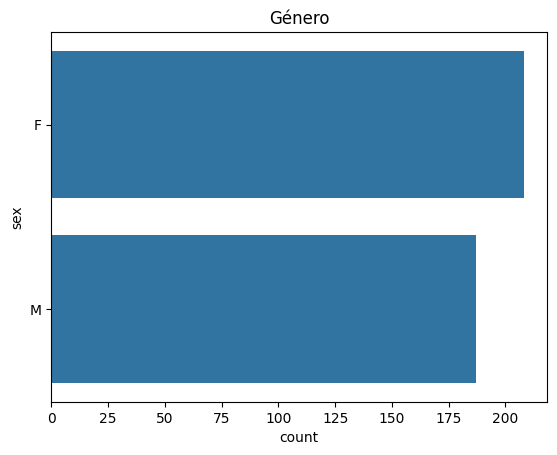

In [107]:
sns.countplot(df["sex"])
plt.title("Género")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7b0337dcb8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b0337dcab90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b0337dca7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b0337dc9390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b0337dc83d0>],
 'means': []}

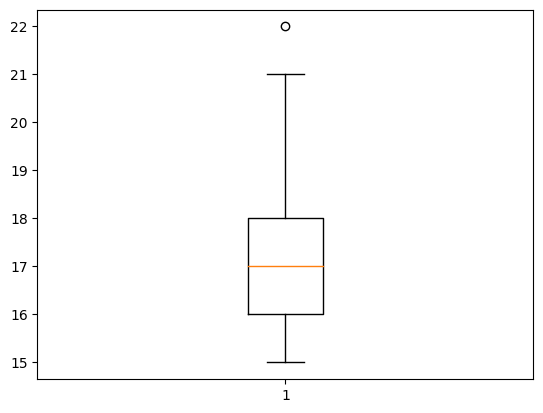

In [108]:
plt.boxplot(df["age"])

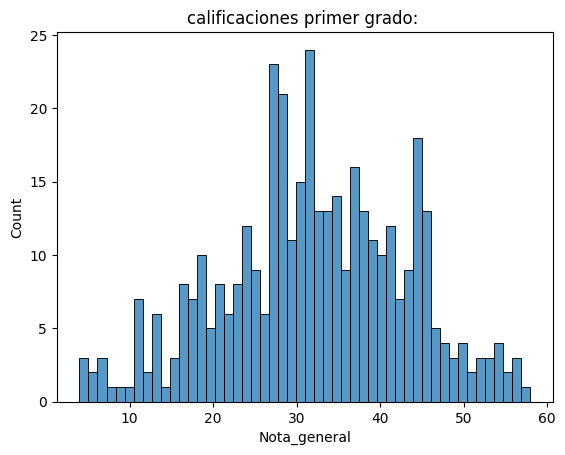

In [109]:
df["Nota_general"]=df["G1"]+df["G2"]+df["G3"]
sns.histplot(df["Nota_general"],bins=50)
plt.title("calificaciones primer grado: ")
plt.show()

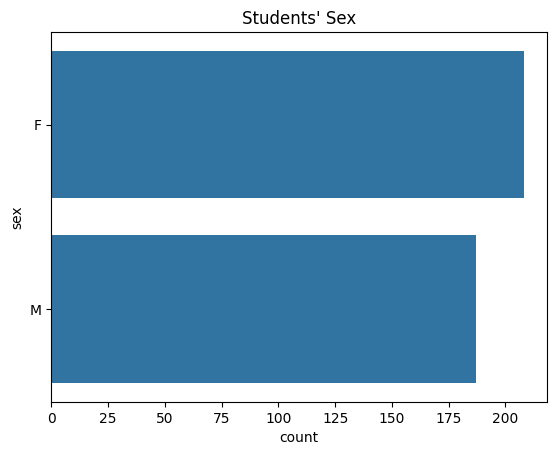

In [110]:
sns.countplot(df["sex"])
plt.title("Students' Sex")
plt.show()

Text(0.5, 1.0, 'faltas en promedio relación con tiempo de studio')

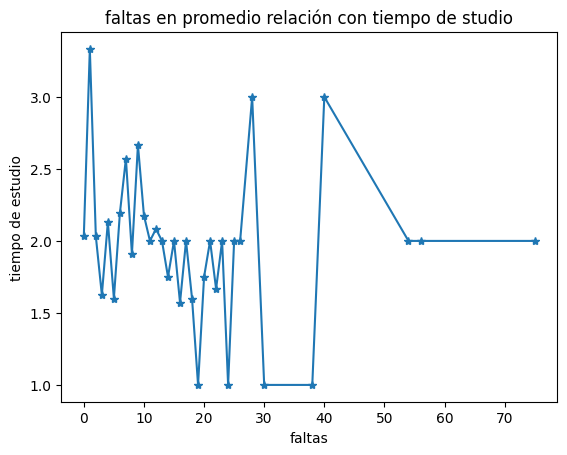

In [111]:
time=df.groupby('absences')['studytime'].mean().plot.line(marker='*')
plt.xlabel('faltas')
plt.ylabel('tiempo de estudio')
plt.title('faltas en promedio relación con tiempo de studio')

Text(0.5, 1.0, 'tiempo de estudio por edad')

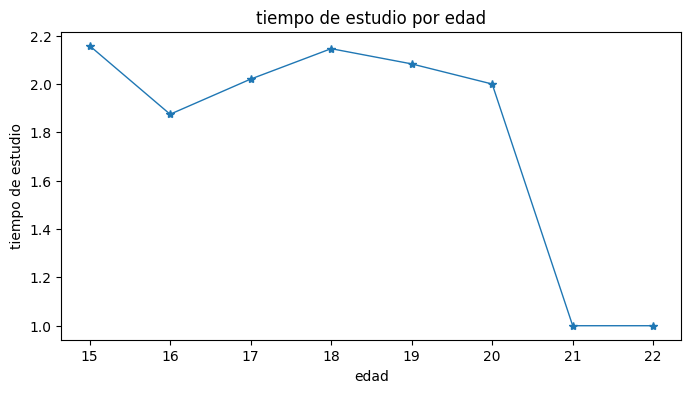

In [112]:
time=df.groupby('age')['studytime'].mean().plot.line(figsize=(8,4),marker='*',linewidth=1)
plt.xlabel('edad')
plt.ylabel('tiempo de estudio')
plt.title('tiempo de estudio por edad')

Text(0.5, 1.0, 'relación familiar  y consumo de alcohol')

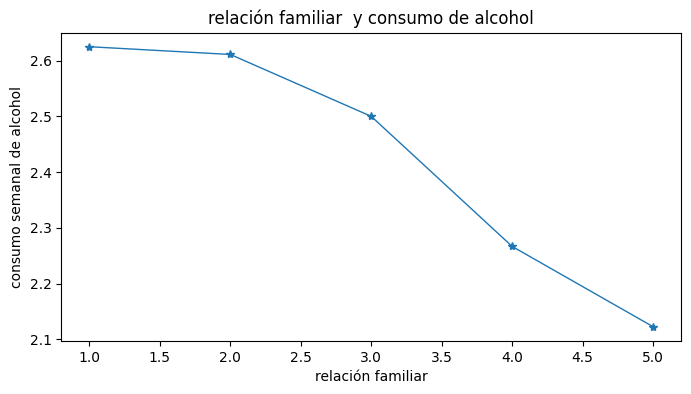

In [113]:
time = df.groupby('famrel')['Walc'].mean().plot.line(figsize=(8,4),marker='*',linewidth=1)
plt.xlabel('relación familiar')
plt.ylabel('consumo semanal de alcohol')
plt.title('relación familiar  y consumo de alcohol')

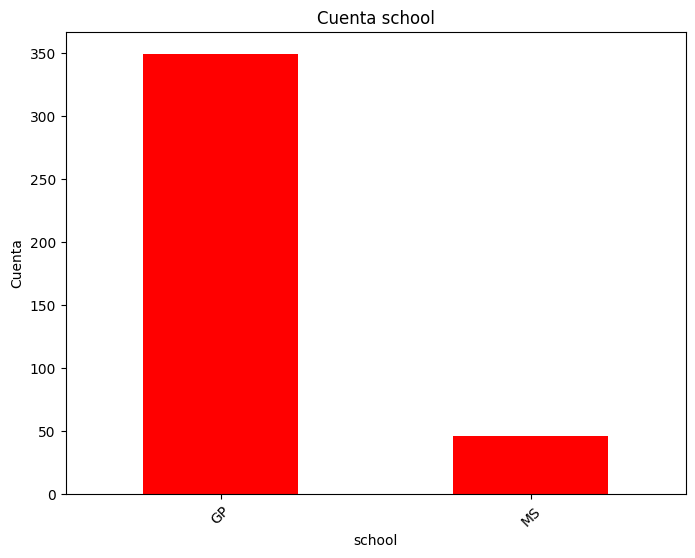

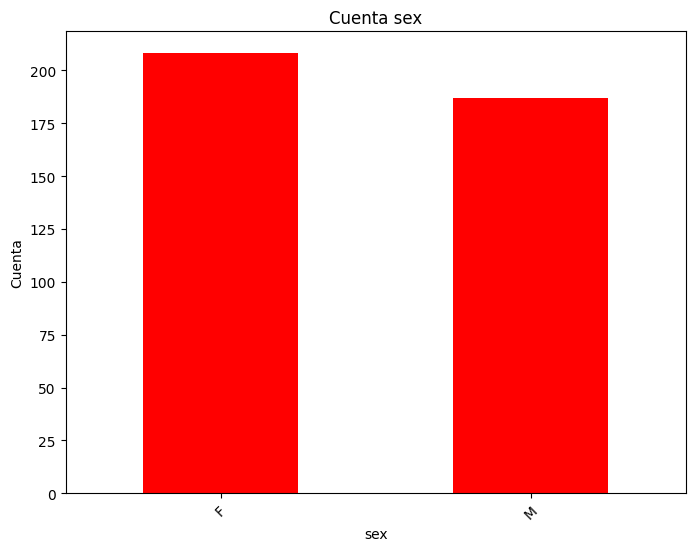

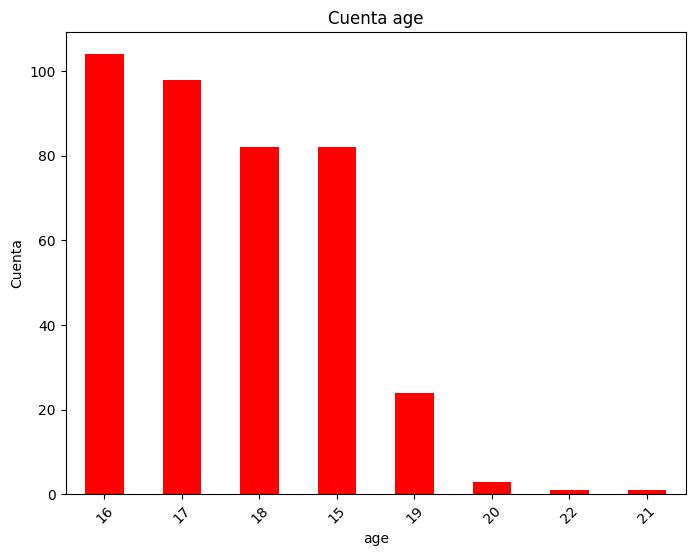

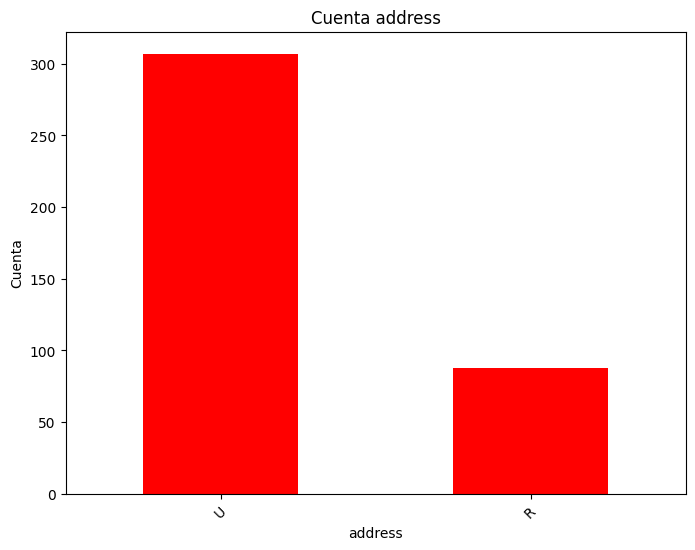

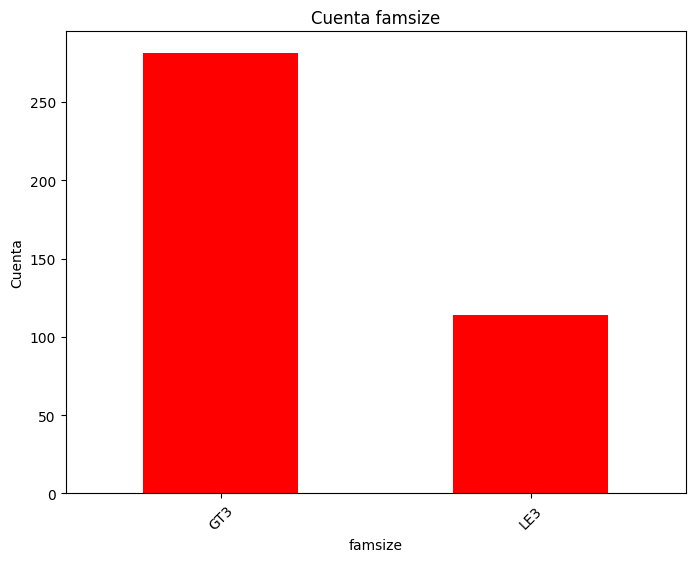

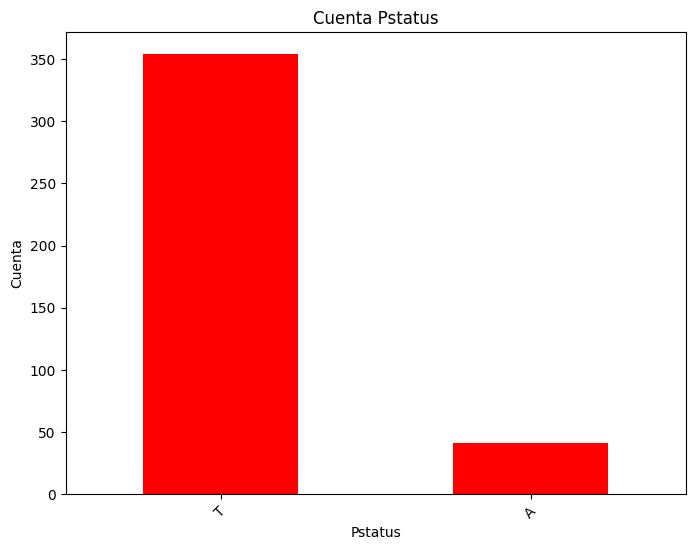

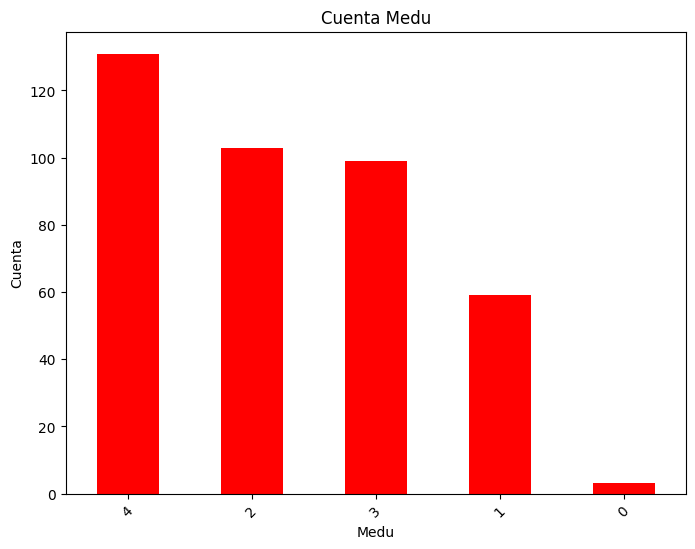

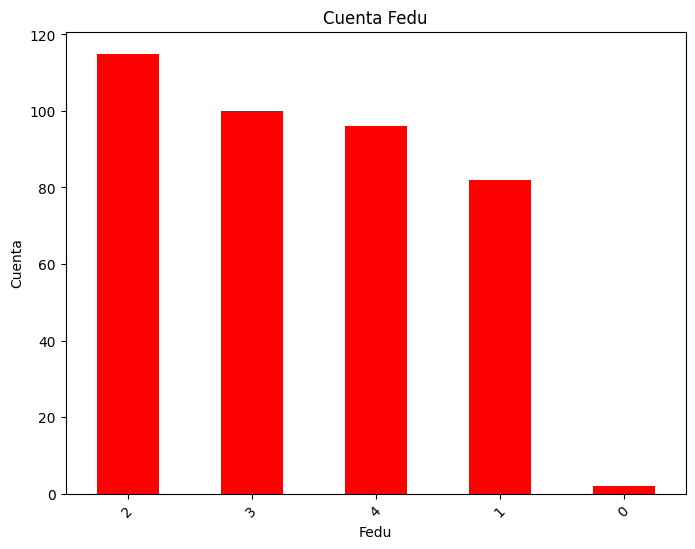

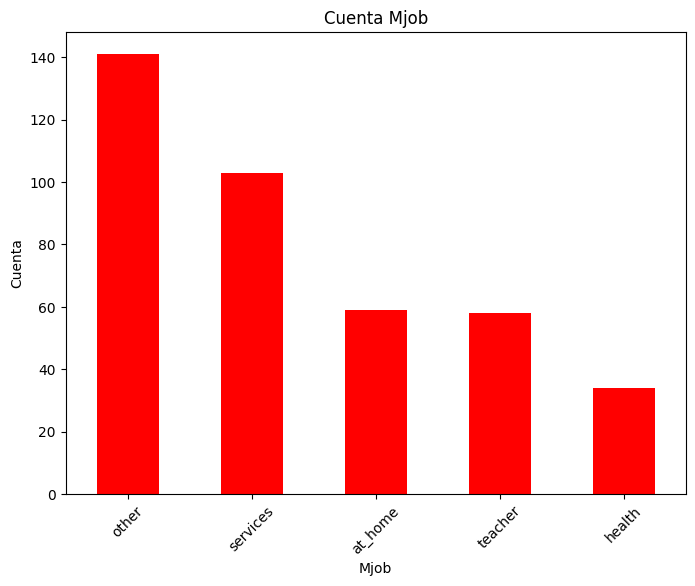

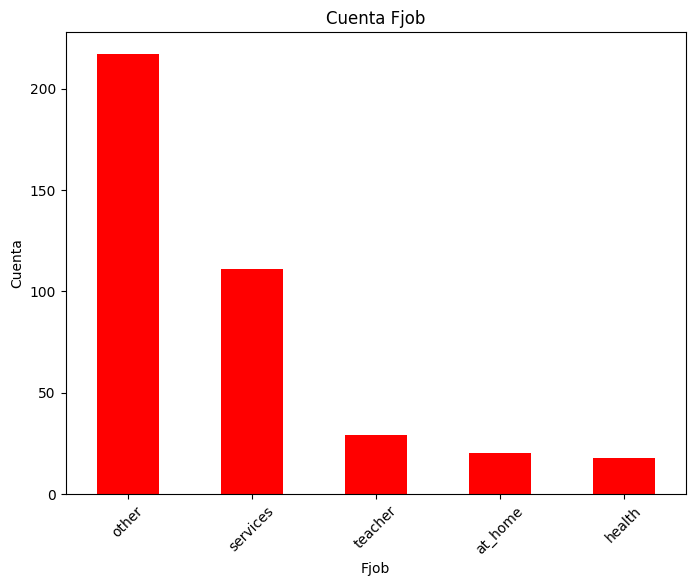

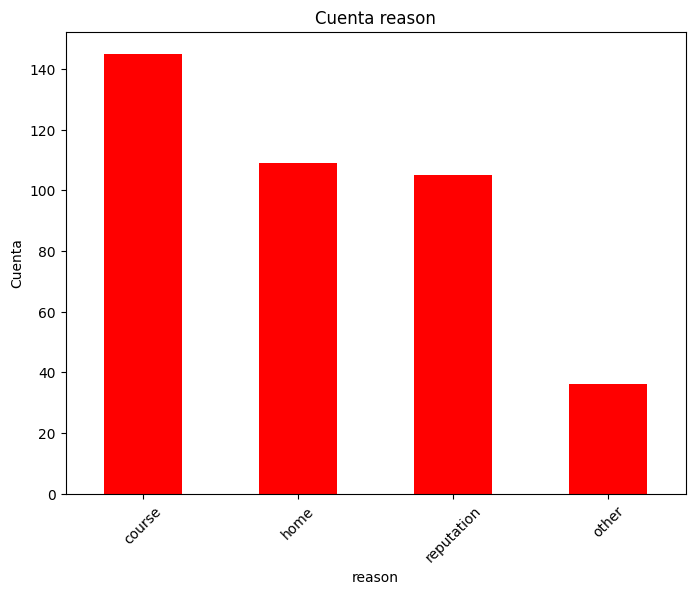

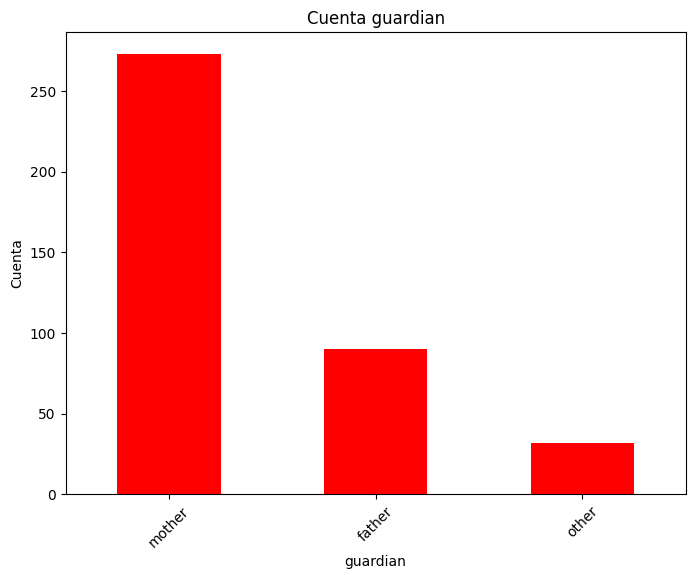

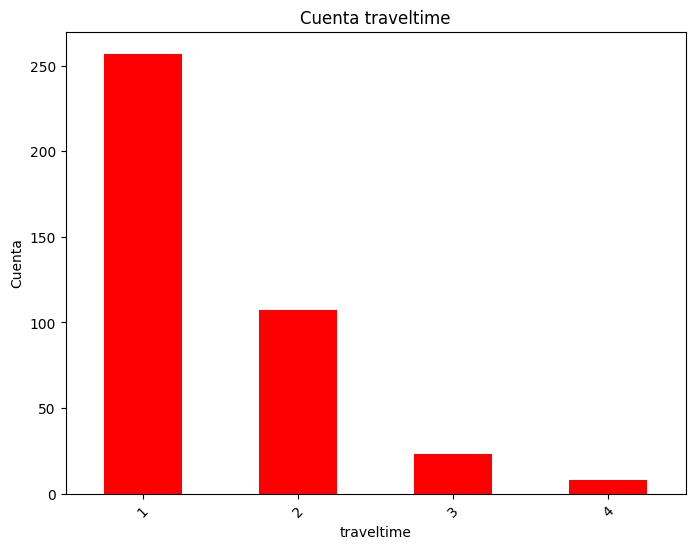

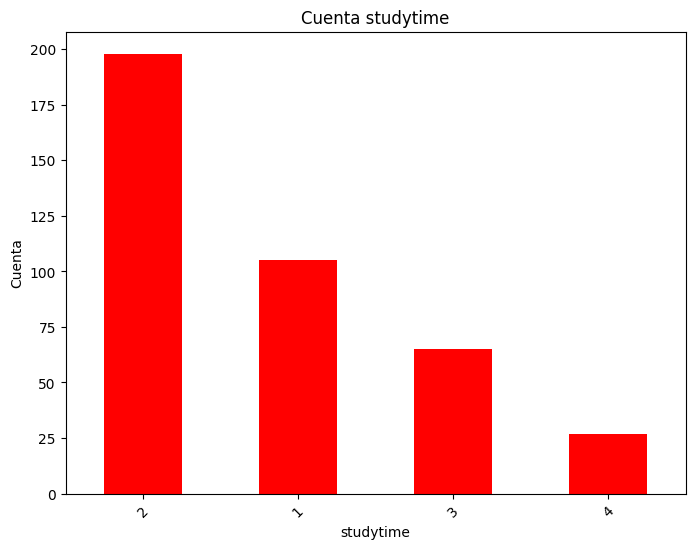

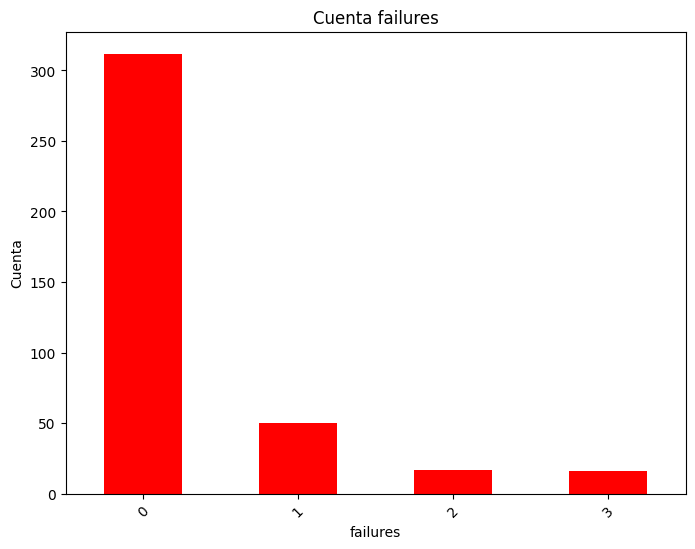

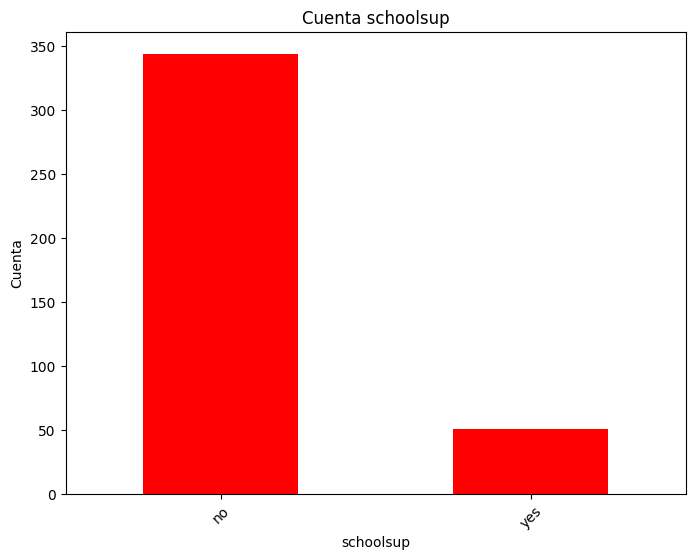

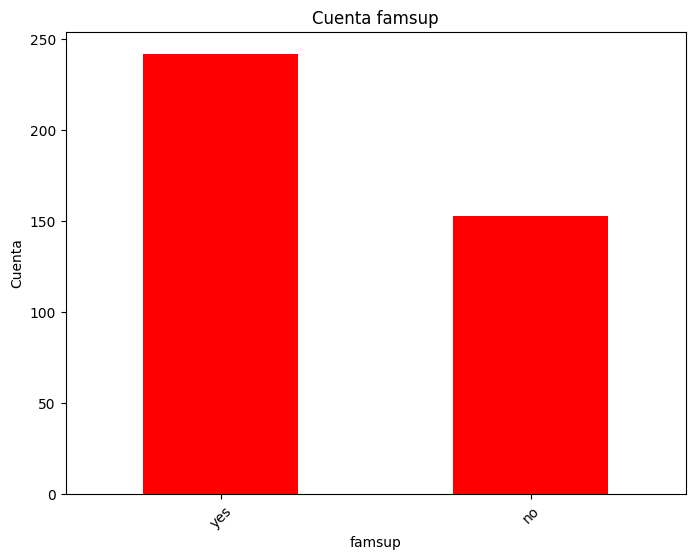

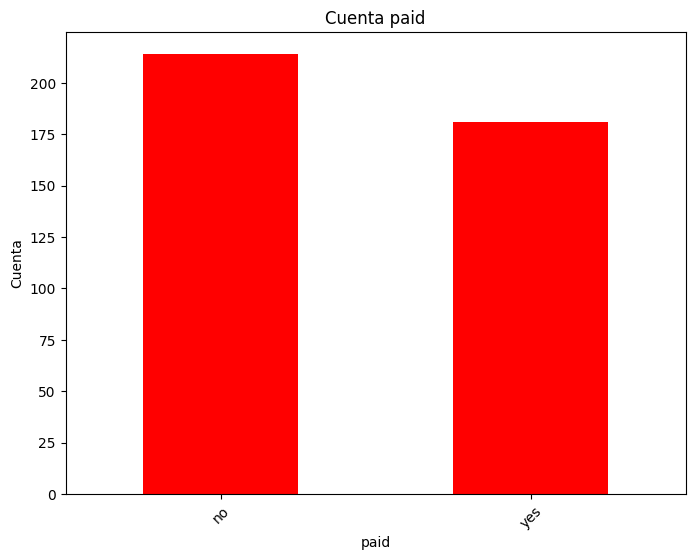

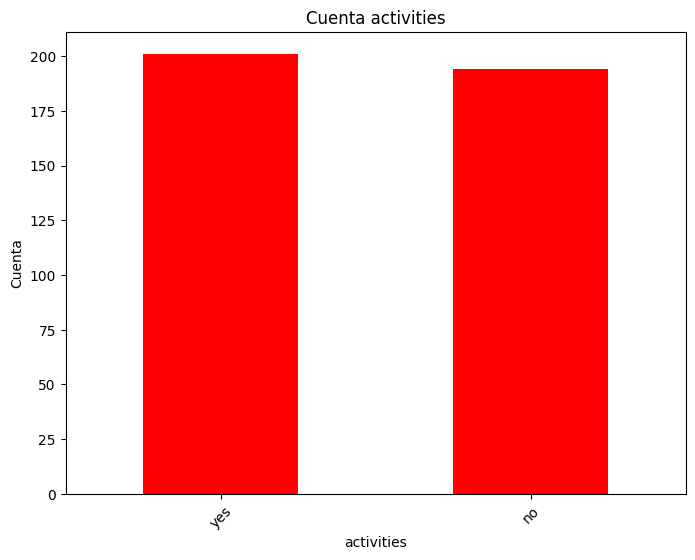

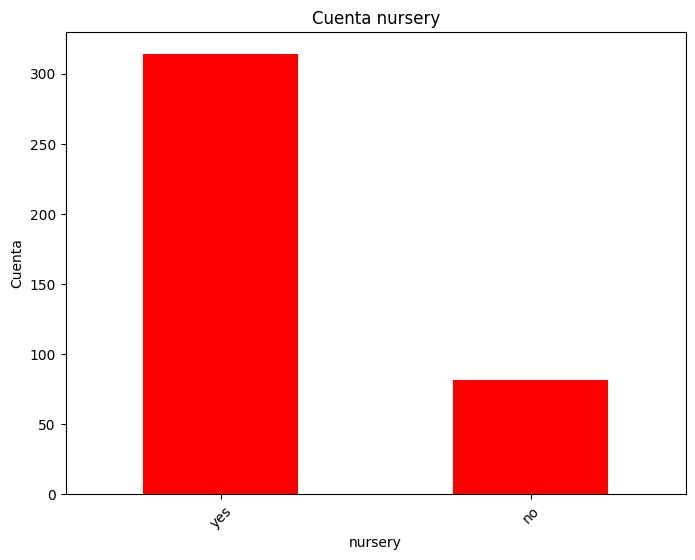

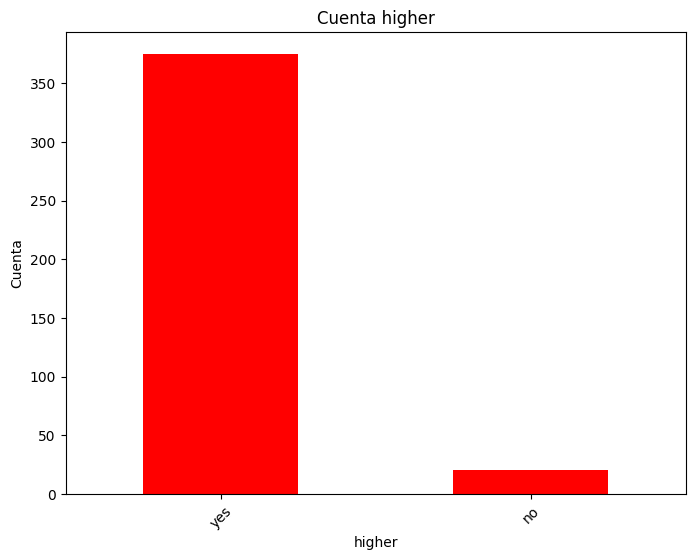

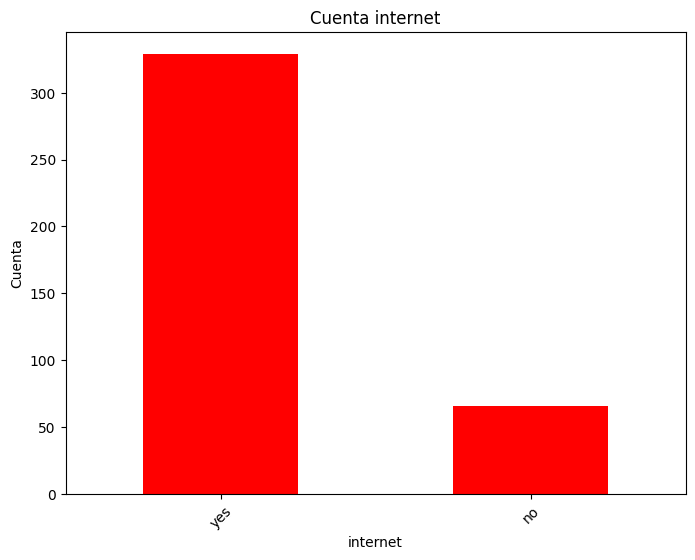

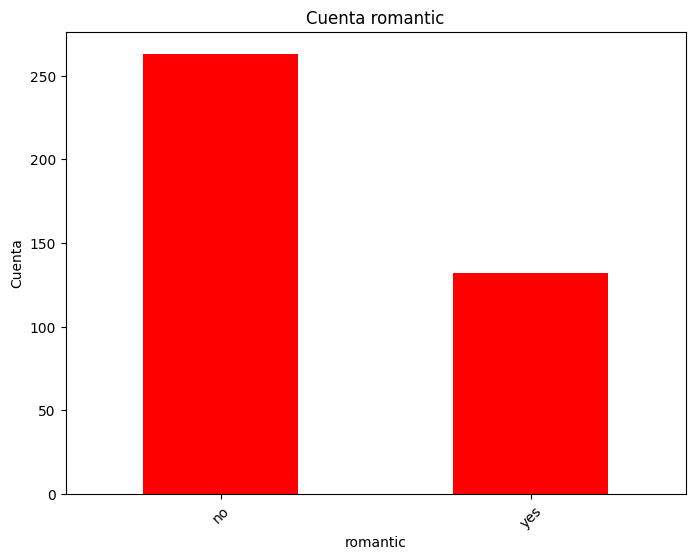

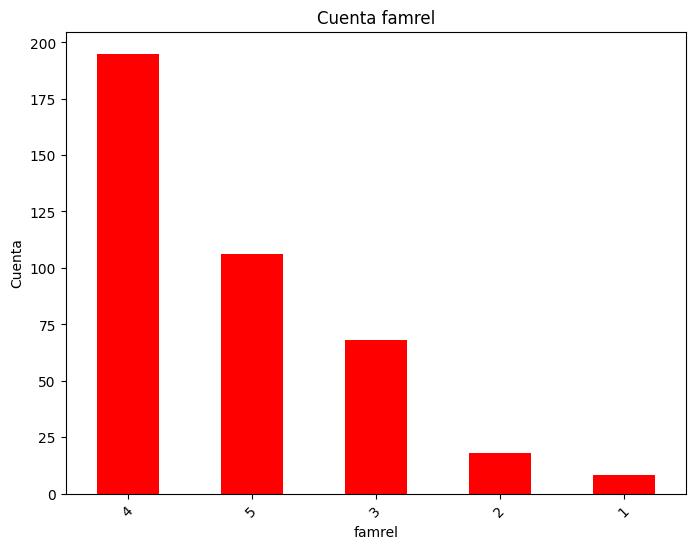

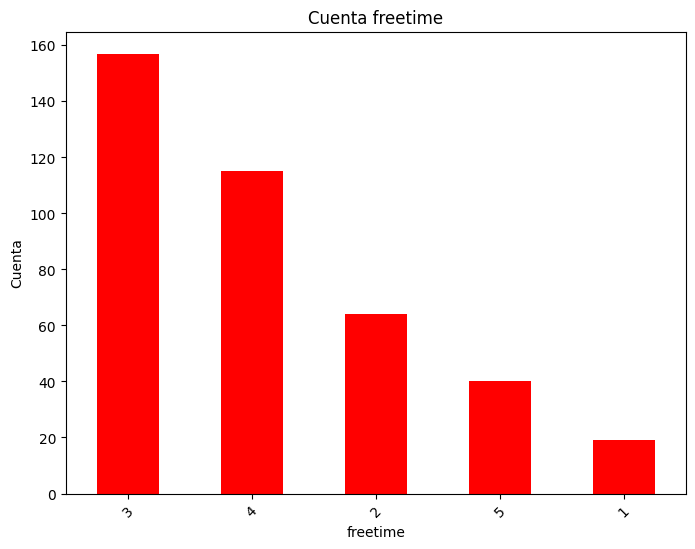

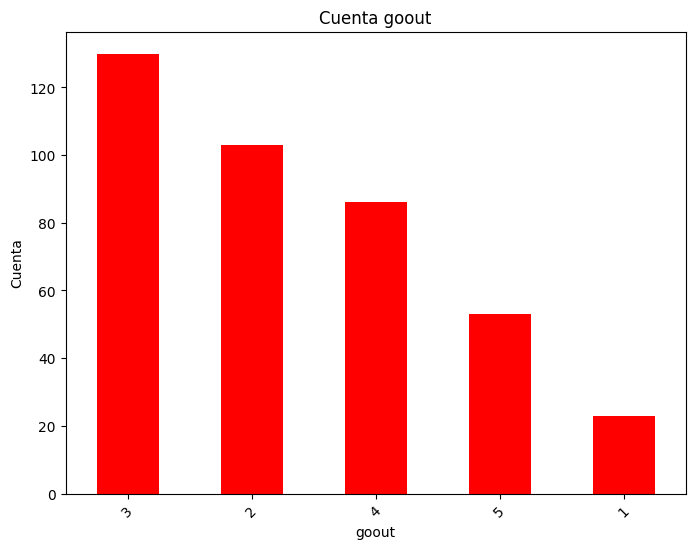

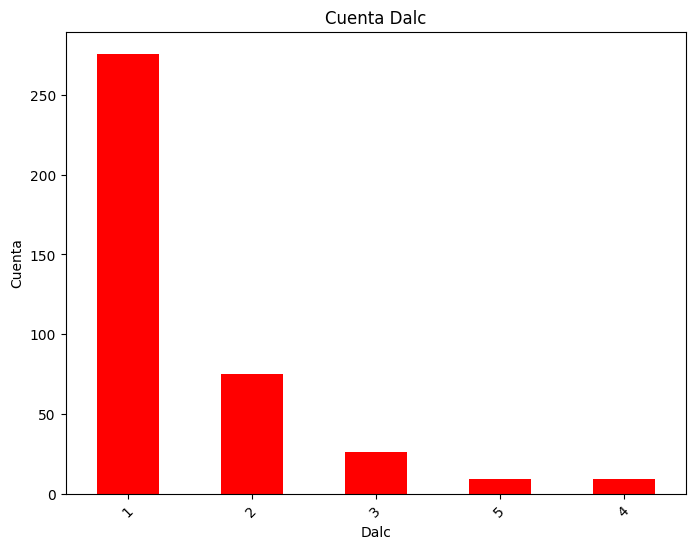

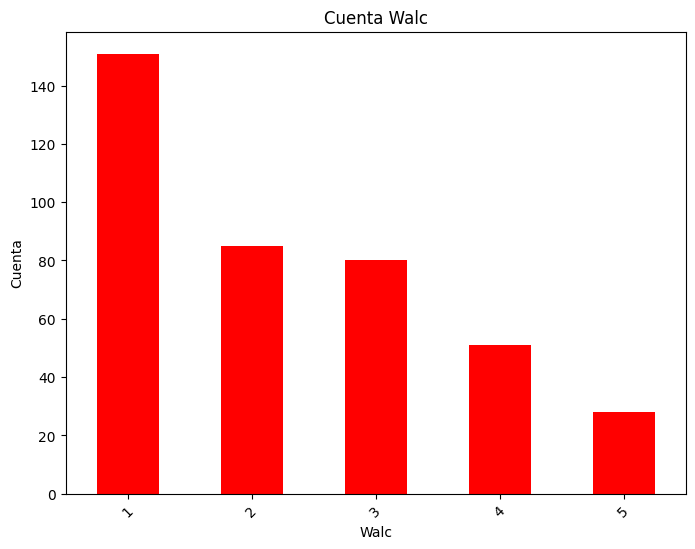

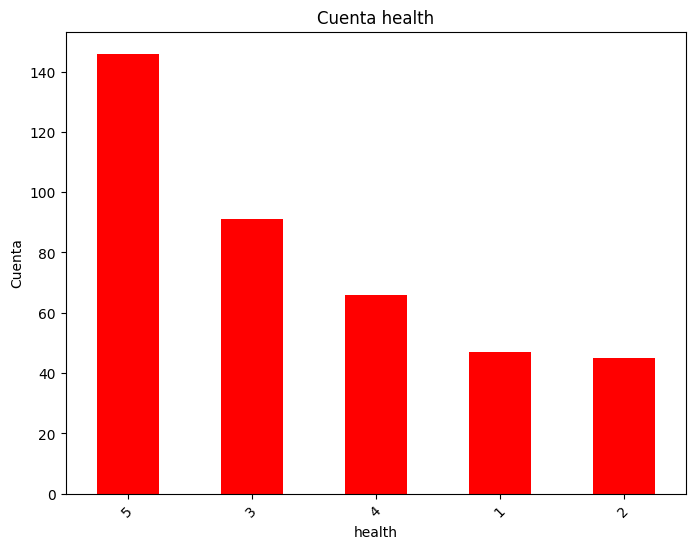

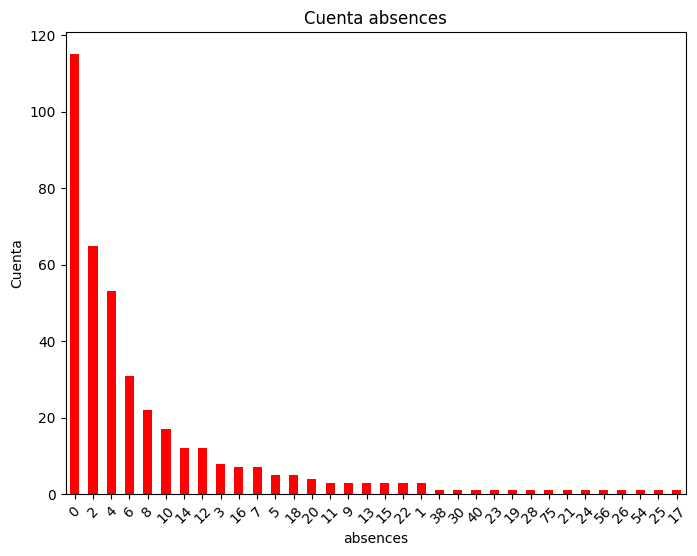

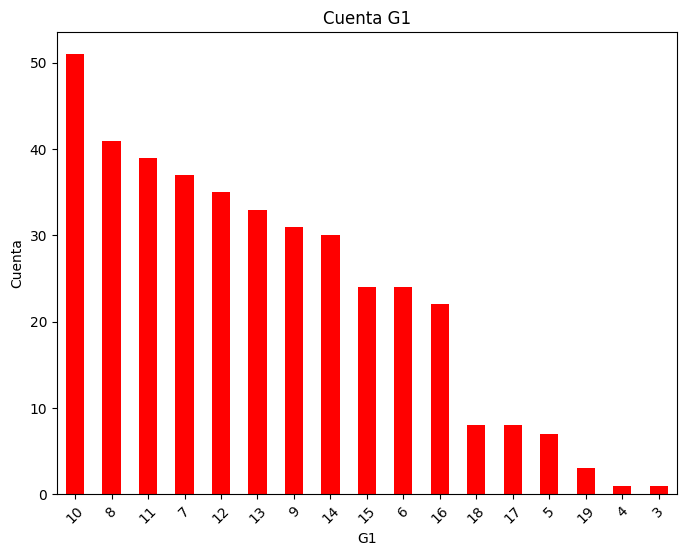

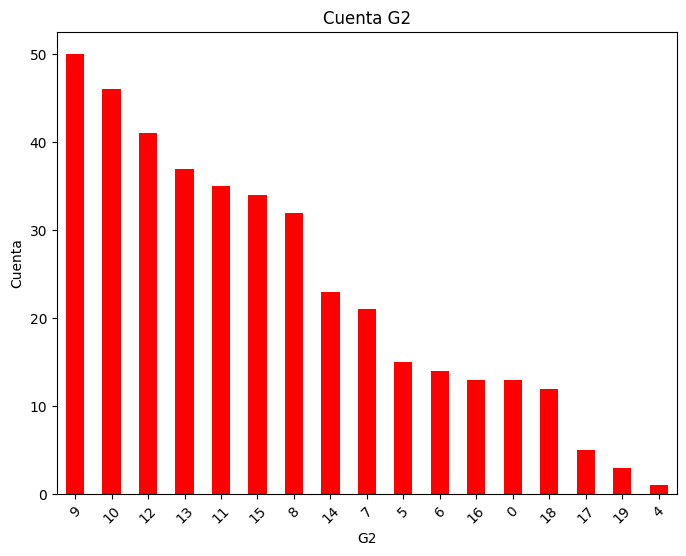

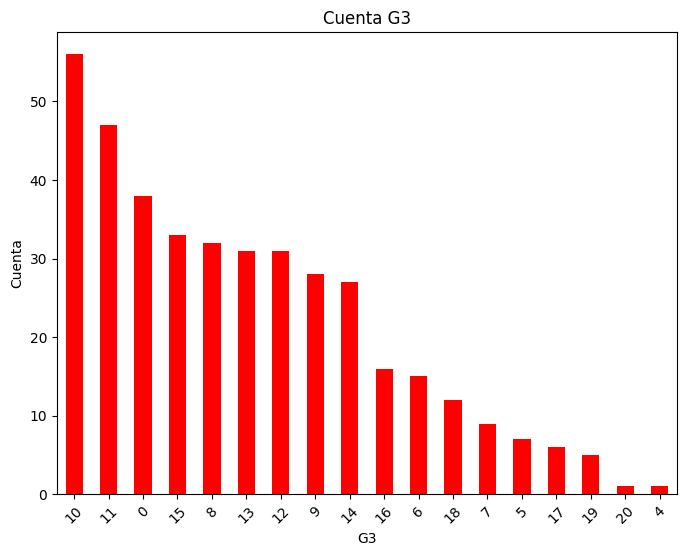

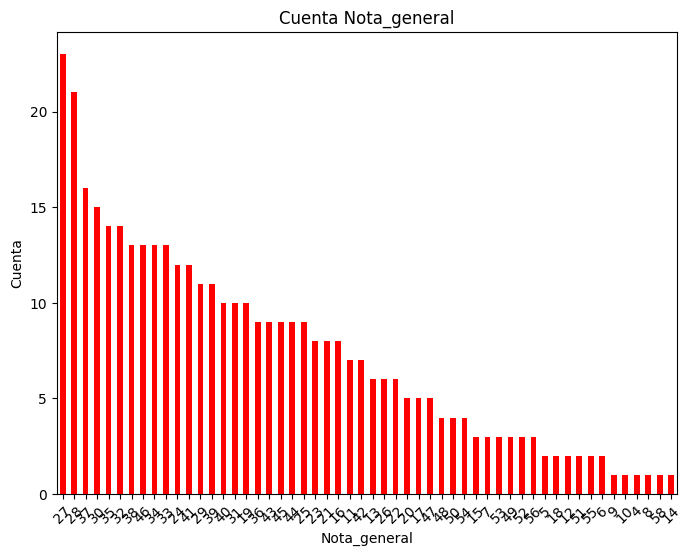

In [114]:
object_columns = df

for column in object_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar', color='red')
    plt.title(f'Cuenta {column}')
    plt.xlabel(column)
    plt.ylabel('Cuenta')
    plt.xticks(rotation=45)
    plt.show()

Text(0.5, 1.0, 'frecuencia de salidas y consumo de alcohol')

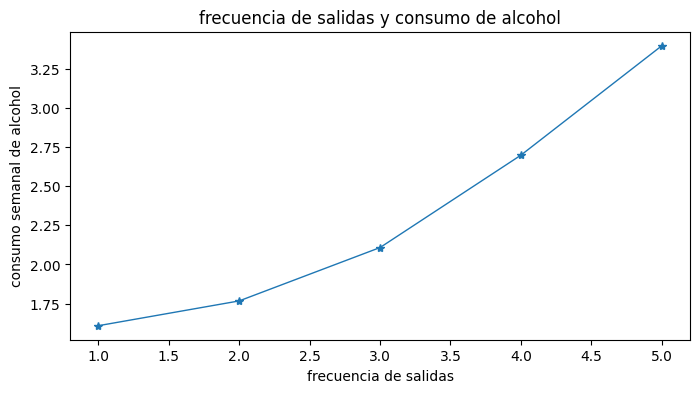

In [115]:
time = df.groupby('goout')['Walc'].mean().plot.line(figsize=(8,4),marker='*',linewidth=1)
plt.xlabel('frecuencia de salidas')
plt.ylabel('consumo semanal de alcohol')
plt.title('frecuencia de salidas y consumo de alcohol')

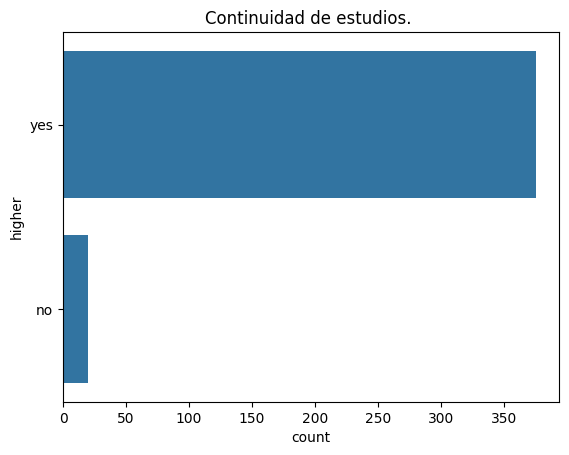

In [116]:
sns.countplot(df["higher"])
plt.title("Continuidad de estudios. ")
plt.show()

# Modelos

In [117]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Nota_general
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,17
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,16
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,25
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,44
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,26
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,45
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,35
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,17
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,53
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,44


In [118]:
df0 = pd.DataFrame(df)

# Select object columns
object_columns = df0.select_dtypes(include=['object'])

# Convert object columns to one-hot encoded columns
df_encoded = pd.get_dummies(object_columns,drop_first=True)

# Drop original object columns
df0 = df0.drop(object_columns.columns, axis=1)

# Concatenate one-hot encoded columns with the original DataFrame
df0 = pd.concat([df0, df_encoded], axis=1)

In [119]:
mapping = {0: 0, 1: 1}  # Define your mapping here

# Apply the mapping to create the new column
df0['response'] = df['Nota_general'].map(lambda x: mapping[0] if x < 30 else mapping[1])

# Drop the original G1, G2, G3 columns
df0.drop(columns=['G1', 'G2', 'G3','Nota_general'], inplace=True)

In [120]:
df0

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,response
0,18,4,4,2,2,0,4,3,4,1,...,False,True,False,False,False,True,True,False,False,0
1,17,1,1,1,2,0,5,3,3,1,...,False,False,True,False,False,False,True,True,False,0
2,15,1,1,1,2,3,4,3,2,2,...,False,True,False,True,False,True,True,True,False,0
3,15,4,2,1,3,0,3,2,2,1,...,False,False,True,True,True,True,True,True,True,1
4,16,3,3,1,2,0,4,3,2,1,...,False,False,True,True,False,True,True,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,True,False,True,True,False,True,True,False,False,0
391,17,3,1,2,1,0,2,4,5,3,...,False,False,False,False,False,False,True,True,False,1
392,21,1,1,1,1,3,5,5,3,3,...,True,False,False,False,False,False,True,False,False,0
393,18,3,2,3,1,0,4,4,1,3,...,False,False,False,False,False,False,True,True,False,1


In [121]:
df0.columns.tolist()

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_MS',
 'sex_M',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'schoolsup_yes',
 'famsup_yes',
 'paid_yes',
 'activities_yes',
 'nursery_yes',
 'higher_yes',
 'internet_yes',
 'romantic_yes',
 'response']

In [122]:
x = df0.drop('response',axis=1)
y = df0['response']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.1,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


100%|██████████| 29/29 [00:05<00:00,  5.06it/s]

[LightGBM] [Info] Number of positive: 207, number of negative: 148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 355, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.583099 -> initscore=0.335507
[LightGBM] [Info] Start training from score 0.335507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.65,0.65,0.65,0.65,0.07
SGDClassifier,0.62,0.64,0.64,0.63,0.05
RandomForestClassifier,0.68,0.64,0.64,0.66,0.99
AdaBoostClassifier,0.65,0.62,0.62,0.65,0.48
LGBMClassifier,0.65,0.62,0.62,0.65,0.20
GaussianNB,0.65,0.61,0.61,0.64,0.04
BernoulliNB,0.62,0.60,0.60,0.62,0.05
QuadraticDiscriminantAnalysis,0.62,0.59,0.59,0.62,0.03
XGBClassifier,0.60,0.59,0.59,0.60,0.66


In [124]:
pip install fairlearn

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from fairlearn.metrics import(
    MetricFrame,
    count,
    false_positive_rate,
    selection_rate)
from sklearn.linear_model import SGDClassifier


In [126]:
df0.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes', 'response'],
      dtype='object')

In [127]:
a = df0.copy()
xx = df0["sex_M"]
#x = a.drop(xx,axis=1)

In [128]:
X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

In [129]:
print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.81
false positive rate   0.77
dtype: float64

By Group:
       tpr  false positive rate
sex_M                          
False 0.79                 0.65
True  0.97                 0.50

difference:
tpr                   0.19
false positive rate   0.15
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


In [130]:
a = df0.copy()
sensitive = df0["romantic_yes"]

X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, sensitive, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.95
false positive rate   0.51
dtype: float64

By Group:
              tpr  false positive rate
romantic_yes                          
False        0.91                 0.74
True         0.86                 0.38

difference:
tpr                   0.05
false positive rate   0.36
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


In [131]:
a = df0.copy()
xx = a['internet_yes']

In [132]:


X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.88
false positive rate   0.94
dtype: float64

By Group:
              tpr  false positive rate
internet_yes                          
False        1.00                 0.60
True         0.88                 0.57

difference:
tpr                   0.12
false positive rate   0.03
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


In [133]:
a = df0.copy()
xx = a['activities_yes']


In [134]:

X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.99
false positive rate   0.57
dtype: float64

By Group:
                tpr  false positive rate
activities_yes                          
False          0.89                 0.72
True           0.88                 0.41

difference:
tpr                   0.01
false positive rate   0.31
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


In [135]:
df0.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'school_MS',
       'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes', 'response'],
      dtype='object')

In [136]:
a = df0.copy()
xx = a['freetime']

In [137]:

X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.80
false positive rate   0.33
dtype: float64

By Group:
          tpr  false positive rate
freetime                          
1        1.00                 0.50
2        0.86                 1.00
3        0.96                 0.60
4        0.80                 0.56
5        0.86                 0.33

difference:
tpr                   0.20
false positive rate   0.67
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64


In [138]:
xx = a['guardian_mother']


In [139]:


X_train, X_test, y_train, y_test, \
    A_train, A_test = train_test_split(x, y, xx, random_state=123)

clf = SGDClassifier(loss='log', alpha=0.001, max_iter=1000, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


metrics = {
    "tpr": recall_score,
    "false positive rate": false_positive_rate}
metric_frame = MetricFrame(
    metrics=metrics, y_true=y_test, y_pred=y_pred, sensitive_features=A_test)

print("Ratio: \n")
print(metric_frame.ratio())

print("\nBy Group:")
print(metric_frame.by_group)

print("\ndifference:")
print(metric_frame.difference())

print("\noverall:")
print(metric_frame.overall)

Ratio: 

tpr                   0.97
false positive rate   0.56
dtype: float64

By Group:
                 tpr  false positive rate
guardian_mother                          
False           0.92                 0.33
True            0.88                 0.59

difference:
tpr                   0.03
false positive rate   0.26
dtype: float64

overall:
tpr                   0.89
false positive rate   0.57
dtype: float64
